# 20161112

## Import

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
help(random.uniform)

Help on method uniform in module random:

uniform(self, a, b) method of random.Random instance
    Get a random number in the range [a, b) or [a, b] depending on rounding.



## Pi

In [3]:
def Pi(n):
    p = 0
    for i in range(0,n):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        R = x**2 + y**2
        if R<=1:
            p += 1
    return p/n * 4

In [4]:
Pi(100)

3.0

In [5]:
Pi(1000)

3.12

In [6]:
Pi(10000)

3.156

In [7]:
def Pi_seq(n):
    X = [i for i in range(0,n)]
    P = [Pi(10000) for i in X]
    return P

In [8]:
P = Pi_seq(1000)
P2 = Pi_seq(1000)

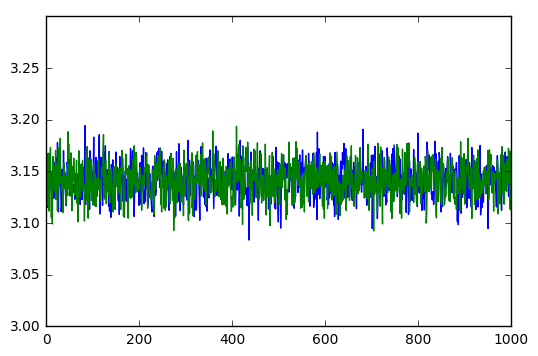

In [9]:
X = [i for i in range(0,1000)]
plt.figure()
plt.plot(X,P)
plt.plot(X,P2)
plt.ylim(3,3.3)
plt.show()

In [10]:
def Mean(X):
    a = 0
    for i in X:
        a += i
    return a/len(X)

In [11]:
Mean(P)

3.141895999999996

In [12]:
Mean(P2)

3.1415736

In [13]:
def hello(f):
    """Decorator that prints Hello!"""
    print 'Hello!'
    def func(*args, **kwargs):
        return f(*args, **kwargs)
    return func

In [14]:
Mean(P)

3.141895999999996

In [15]:
@hello
def Mean(X):
    a = 0
    for i in X:
        a += i
    return a/len(X)

Hello!


In [16]:
from math import pi
E = [(i - pi)**2 for i in P]
E2 = [(i - pi)**2 for i in P2]

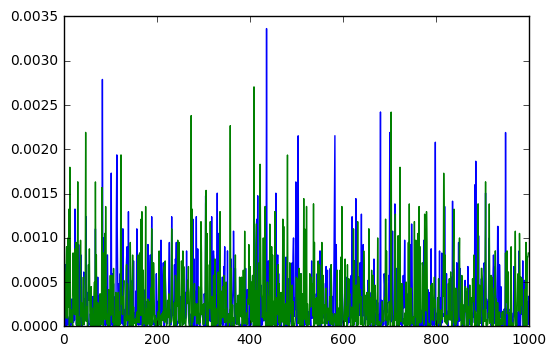

In [17]:
plt.figure()
plt.plot(X,E)
plt.plot(X,E2)
plt.show()

In [18]:
Mean(E)

0.0002673487230445856

In [19]:
Mean(E2)

0.00028527262607928416

## Integration 

In [20]:
# Numerical Integration using Monte Carlo method
# FB - 201006137
import random
import math

# define any function here!
def f(x):
    return x**2

# define any xmin-xmax interval here! (xmin < xmax)
xmin = 0.0
xmax = 1.0

# find ymin-ymax
numSteps = 1000000 # bigger the better but slower!
ymin = f(xmin)
ymax = ymin
for i in range(numSteps):
    x = xmin + (xmax - xmin) * float(i) / numSteps
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPoints = 1000000 # bigger the better but slower!
ctr = 0
for j in range(numPoints):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if math.fabs(y) <= math.fabs(f(x)):
        if f(x) > 0 and y > 0 and y <= f(x):
            ctr += 1 # area over x-axis is positive
        if f(x) < 0 and y < 0 and y >= f(x):
            ctr -= 1 # area under x-axis is negative

fnArea = rectArea * float(ctr) / numPoints
print "Numerical integration = " + str(fnArea)

Numerical integration = 0.333102333794


In [21]:
class NotEqualLenError(object):
    pass

def Putlist(a):
    if len(a) == 2:
        return a
    else:
        raise NotEqualLenError()

def MC_int(f, a, N=1000000):
    try:
        a = Putlist(a)
        x_min = a[0]
        x_max = a[1]
        y_min = f(x_min)
        y_max = f(x_max)
        # Find y_min, y_max :
        for i in range(N):
            x = x_min + (x_max - x_min) * float(i) / N
            y = f(x)
            if y < y_min:
                y_min = y
            if y > y_max:
                y_max = y
        # Rectangle Area
        Area = (x_max - x_min) * (y_max - y_min)
        # Monte Carlo!
        count = 0
        for j in range(N):
            x = x_min + (x_max - x_min) * random.uniform(0,1)
            y = y_min + (y_max - y_min) * random.uniform(0,1)
            if math.fabs(y) <= math.fabs(f(x)):
                if f(x) > 0 and y > 0 and y <= f(x): # Over x-axis
                    count += 1
                if f(x) < 0 and y < 0 and y >= f(x): # Under x-axis
                    count -= 1
        return Area * float(count) / N
    except NotEqualLenError:
        print "Impatible Length of Interval"

In [22]:
MC_int(f, [0, 1])

0.333134

In [23]:
def g(x):
    return math.sqrt(1-x**2)

In [24]:
MC_int(g,[0,1])*4

3.1336301027841373

In [25]:
from montecarlo import montecarlo
from random import randint

In [26]:
def fliphead(g):
    return randint(0,1)==0

In [27]:
fliphead(10)

False

In [28]:
mc = montecarlo(fliphead)

In [29]:
mc.run()

Iteration #10000: 0.5013
Iteration #20000: 0.50235
Iteration #30000: 0.502433333333
Iteration #40000: 0.505
Iteration #50000: 0.50582
Iteration #60000: 0.50445
Iteration #70000: 0.5027
Iteration #80000: 0.5041
Iteration #90000: 0.503877777778
Iteration #100000: 0.50357
Iteration #110000: 0.504172727273
Iteration #120000: 0.503391666667
Iteration #130000: 0.502884615385
Iteration #140000: 0.502478571429
Iteration #150000: 0.501993333333
Iteration #160000: 0.5018875
Iteration #170000: 0.501464705882
Iteration #180000: 0.501277777778
Iteration #190000: 0.501205263158
Iteration #200000: 0.501125
Iteration #210000: 0.501085714286
Iteration #220000: 0.501281818182
Iteration #230000: 0.501317391304
Iteration #240000: 0.5014625
Iteration #250000: 0.501448
Iteration #260000: 0.501496153846
Iteration #270000: 0.501448148148
Iteration #280000: 0.501346428571
Iteration #290000: 0.501055172414
Iteration #300000: 0.501203333333
Iteration #310000: 0.501419354839
Iteration #320000: 0.501190625
Iterati

0.500725

In [30]:
def Ispi(g):
    return abs(Pi(1000) - pi)<1E-2

In [31]:
mc = montecarlo(Ispi)

In [ ]:
mc.run(100000)

Iteration #10000: 0.1522


In [42]:
def Ispi2(g):
    return abs(Pi(10000) - pi)<1E-2

In [43]:
mc = montecarlo(Ispi2)

In [45]:
mc.run(100000)

Iteration #10000: 0.4546
Iteration #20000: 0.45515
Iteration #30000: 0.454133333333
Iteration #40000: 0.4558
Iteration #50000: 0.4568
Iteration #60000: 0.456333333333
Iteration #70000: 0.456014285714
Iteration #80000: 0.456675
Iteration #90000: 0.456444444444
Iteration #100000: 0.45629
======= FINAL ========
Iteration #100000: 0.45629


0.45629